# Introduction

There are two kinds of machine learning algorithms. Unsupervised which takes some traing data and tries to make use of it with new data given to the program. The latter is called supervised which tries to make a pattern of the data that is the already present. The KNN-algorithm which is implemented below, is a type of machine learning in that unsupervised catagory. In this algorithm I'm giving the KNN function images consisting of numbers, and using the given data to the function, it's finds the predicted value which corresponds closely to the images. In my algorithm I have given it some amount of data called `training_data`, `training_labels`, `x` and `n`. The `training_data` consist of images as will be shown below in examples. The`training_label` coressponds each of the images, giving the actual number in the image. `x` is the data that the program will use to figure out what number is in the image, and `n` will output `n` numbers closest to the predicted label. I've also include the image of the predicted number. The procces for the KNN function is first, images are compared with the given data using a `dist` function which finds the distances between the `training_data` and `x`. Then I sort out the `dist` to find the shorest distances. The smallest distances are then used to find the predicted label in the `training_label` which is then later to be returned by the function. The number of other closer predicted are used to return at the end of the function. To better understand the KNN Algorithm, I gave the function different amounts of data to see how accurelty it's predicting the data.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from ipywidgets import interact, fixed

The function `dist` below finds the distances between in given X and w valeus given to the program. This will be used in the KNN function. After the `dtst` function is the `knn` function which performs the KNN algorithm.

In [2]:
# helper function returns distance between training data and given data
def dist(X,w):
    a = (X - w)**2
    b = np.sqrt(a.sum(axis=1))
    return b




def knn(training_data, training_labels, x, n):
    
    a = (dist(training_data,x)) #finds distances between training data and x
   
    b = np.sort(a) #sorts the distances data in a list
    c = np.argsort(a) #output indices of data smallest distance to x
    
   
    #rearranges training_data corresding to the sorted data
    training = training_labels[c] 
  
    #code to sow iamge of predicted label
    num = c[0]
    img1 = training_data[num].reshape(28,28)
    plt.title("Label of predicted imaged:")
    plt.imshow(img1, cmap="binary")
    
    

    return (f"Predicted label:{training[0]}, Neighbors {training[1:n]}" )
    

    

   


Below we are opening two files which has the data that are then sent to fuction. All the data that i recevie are split to training data and testing data that'll be used to predicted in the function. To keep the data different during every time this program run, I've included a random method that'll output random numbers that'll change the data. That way we can see if the data being predicted isnt always the same ones being Outputted. We then input the data to the function and you get the reuturned predicted data. I run the function with only 10 training data and 10 training labels and increase with each run to see how well it predicts from smaller to larger data given.

'Predicted label:7, Neighbors [7 8 6 0]'

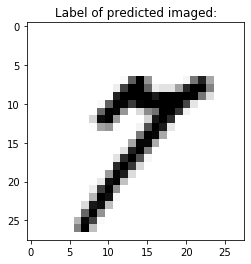

In [3]:
#opening data from files
with open("train-images.idx3-ubyte","rb") as foo:
    f_img = foo.read()
    
with open("train-labels.idx1-ubyte","rb") as foo:
    f_lab = foo.read()

#making data ready for the fucntion
images = np.array([b for b in f_img[16:]]).reshape(-1,28*28)

labels = np.array([b for b in f_lab[8:]])

#random method to output different numbers
rng = np.random.default_rng()
permutation = rng.permutation(len(images))
images = images[permutation]
labels = labels[permutation]

#creating variables for function
training_data = images[:10]
training_labels = labels[:10]
x = images[4:]
n = 5
x=2
knn(training_data, training_labels, x, n)

It appears the given number makes the images the the numebrs closest the this numbers AKA the neighbors seem a bit off. In the next few runs we give it more data and you'll notice the `n` neighboors become closer to the image. The next is given 50 training data and 50 training labels.

'Predicted label:1, Neighbors [9 1 0 1]'

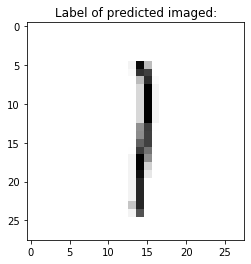

In [4]:
training_data = images[:50]
training_labels = labels[:50]
x = images[30:]
n = 5
x=2
knn(training_data, training_labels, x, n)

The predicted data resembles the image, and the `n` neighboors are becoming more accurate. The last test is given 20000 training data and 20000 training labels. 

'Predicted label:1, Neighbors [1 1 1 1]'

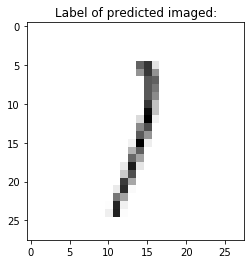

In [6]:
training_data = images[:20000]
training_labels = labels[:20000]
x = images[30:]
n = 5
x=2
knn(training_data, training_labels, x, n)

As we can see the `n` neighboor are showing the number that came up closest to this image and predicted label. Which means it has brought togther the closest numbers possible to this iamge from the 20000 trainign data and training label.  

## Conclusion

The KNN algortim just takes data and finds which is closest to the training data. Then predicts what is the given data is suppose to be. As we saw the more data we give it the more accurate the predictions are. 